##### Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
pd.pandas.set_option('display.max_columns',None)
import sklearn 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import statsmodels 
import statsmodels.api as sm

##### Loading and Storing the data 

In [2]:
data = pd.read_csv('insurance.csv')

In [3]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
data.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


##### Basic Checks

In [5]:
shape = data.shape
print('The shape is : {} '.format(shape))

The shape is : (1338, 7) 


In [6]:
size = data.size
print('The size is : {}'.format(size))

The size is : 9366


In [7]:
ndim = data.ndim
print('The number of dimensions are {}'.format(ndim))

The number of dimensions are 2


In [51]:
print(data.max())

age            64.00000
sex             1.00000
bmi            53.13000
children        5.00000
smoker          1.00000
region          3.00000
charges     63770.42801
dtype: float64


In [52]:
print(data.min())

age           18.0000
sex            0.0000
bmi           15.9600
children       0.0000
smoker         0.0000
region         0.0000
charges     1121.8739
dtype: float64


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [9]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [11]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

##### EDA

In [12]:
numerical_features =[feature for feature in data.columns if data[feature].dtypes !='O']
print('Number of numerical variables :',len(numerical_features))
data[numerical_features].head()

Number of numerical variables : 4


,age,bmi,children,charges
0,19,27.900,0,16884.92400
1,18,33.770,1,1725.55230
2,28,33.000,3,4449.46200
3,33,22.705,0,21984.47061
4,32,28.880,0,3866.85520


In [13]:
categorical_features =[feature for feature in data.columns if data[feature].dtypes =='O']
print('Number of categorical variables :',len(categorical_features))
data[categorical_features].head()

Number of categorical variables : 3


,sex,smoker,region
0,female,yes,southwest
1,male,no,southeast
2,male,no,southeast
3,male,no,northwest
4,male,no,northwest


In [14]:
corr = data.corr()
corr

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


In [15]:
data.corr()['charges'].sort_values()

children    0.067998
bmi         0.198341
age         0.299008
charges     1.000000
Name: charges, dtype: float64

<AxesSubplot:>

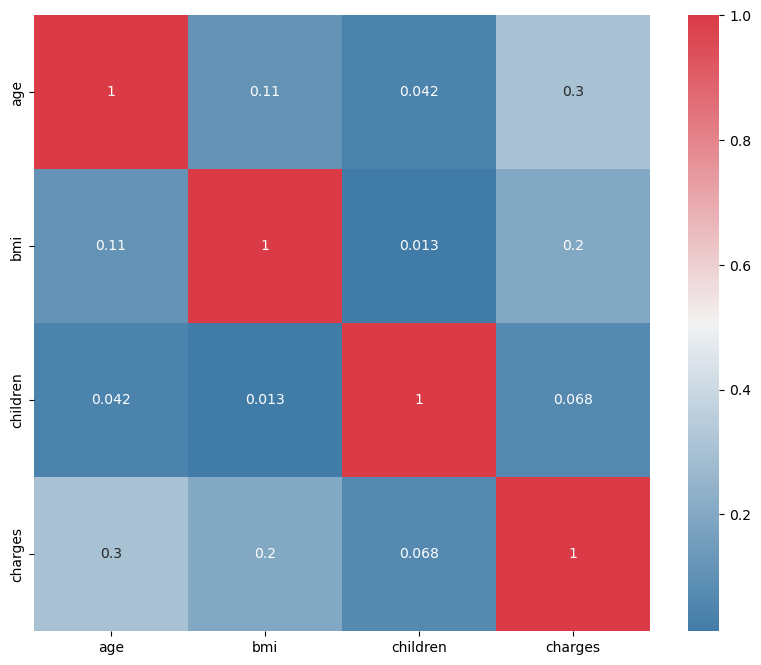

In [16]:
f, ax = plt.subplots(figsize=(10, 8))
corr = data.corr()
sns.heatmap(corr,square=True,ax=ax,annot=True,cmap=sns.diverging_palette(240,10,as_cmap=True))

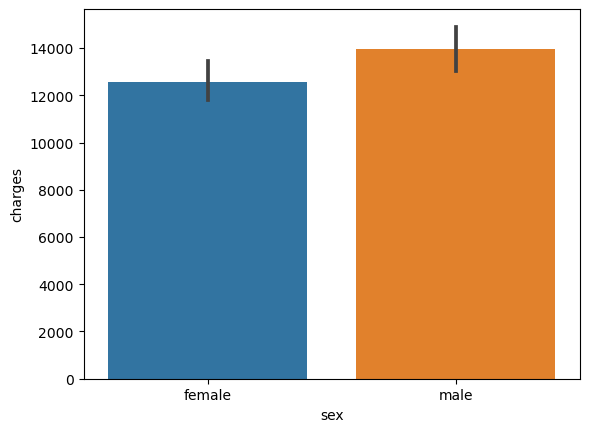

In [17]:
sns.barplot(x='sex',y='charges',data=data)
plt.show()

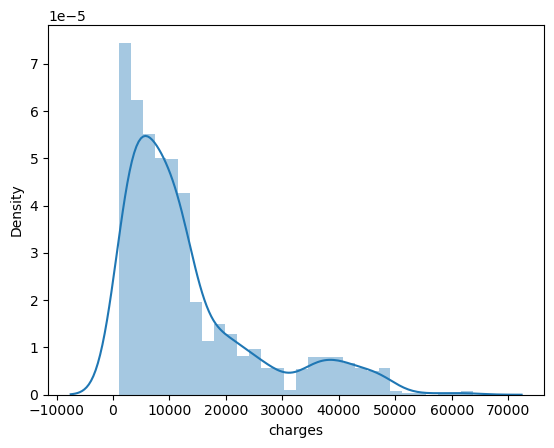

In [18]:
plot = data['charges']
sns.distplot(plot)
plt.show()

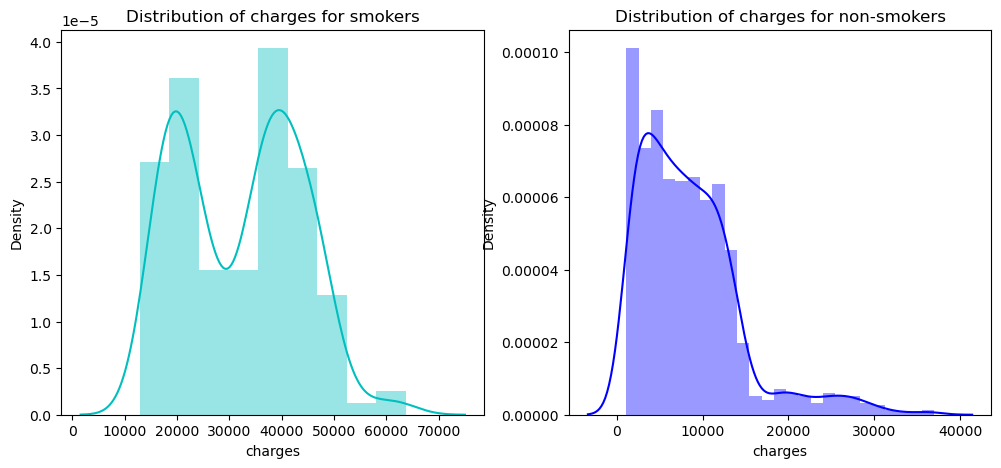

In [19]:
f= plt.figure(figsize=(12,5))
ax=f.add_subplot(121)
sns.distplot(data[(data.smoker == 'yes')]["charges"],color='c',ax=ax)
ax.set_title('Distribution of charges for smokers')

ax=f.add_subplot(122)
sns.distplot(data[(data.smoker == 'no')]['charges'],color='b',ax=ax)
ax.set_title('Distribution of charges for non-smokers')
plt.show()

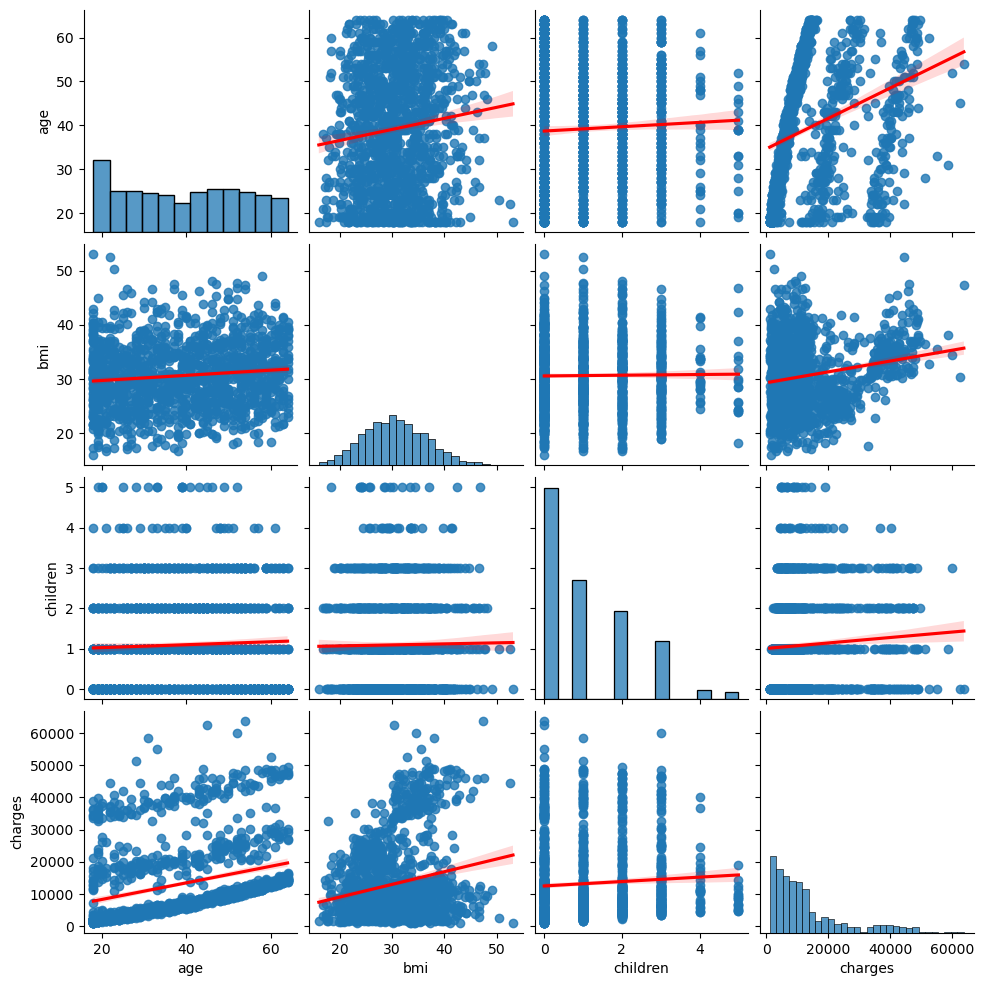

In [20]:
sns.pairplot(data,kind='reg',plot_kws={'line_kws':{'color':'red'}})
plt.show()

In [21]:
num = ['age','children']

Countplot of sex


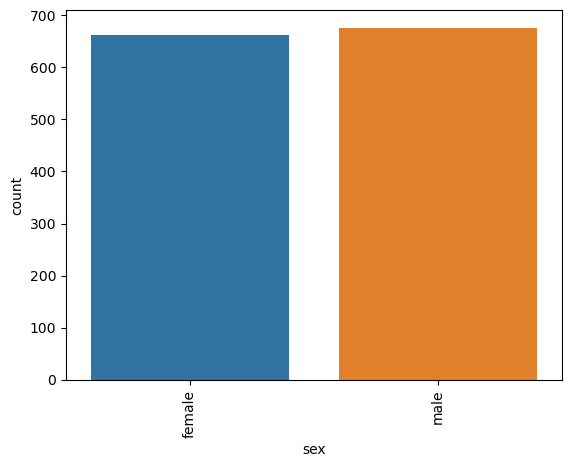

Countplot of smoker


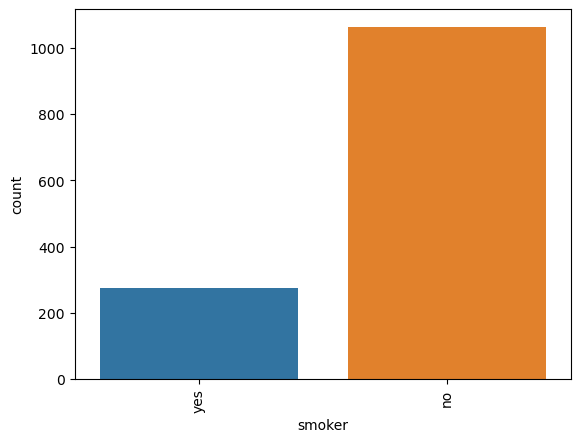

Countplot of region


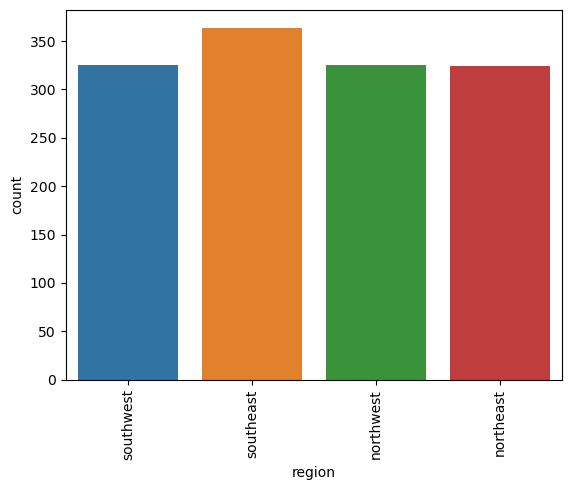

In [22]:
for i in categorical_features: 
    print("Countplot of",i)
    sns.countplot(data[i])
    plt.xticks(rotation='vertical')
    plt.show()

Countplot of age


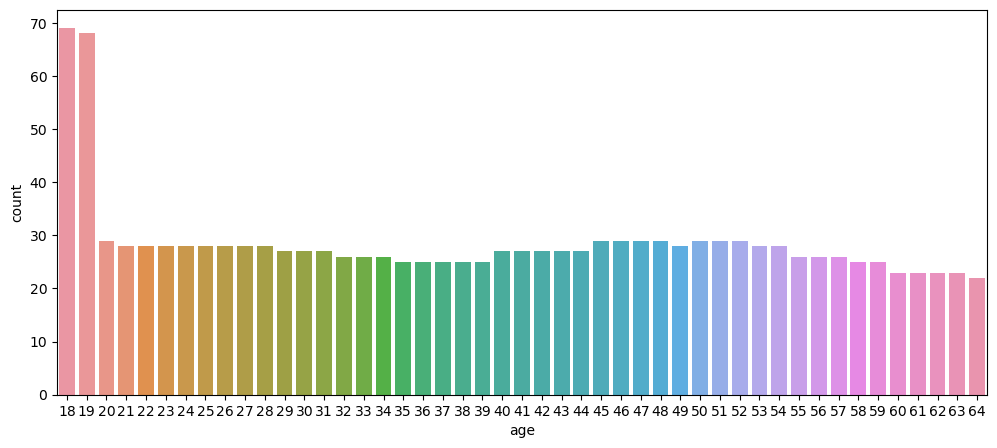

Countplot of children


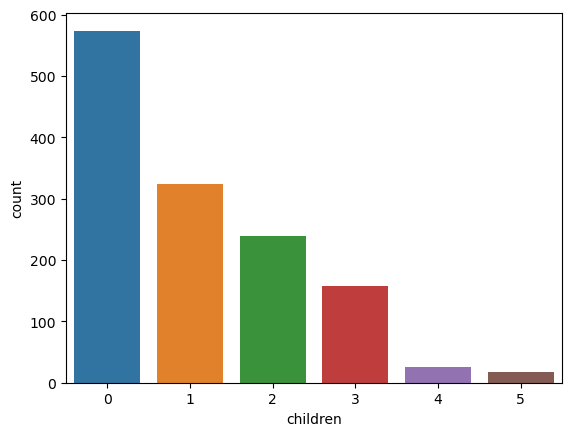

In [23]:
f= plt.figure(figsize=(12,5))
for i in num: 
    print("Countplot of",i)
    sns.countplot(data[i])
    plt.xticks()
    plt.show()

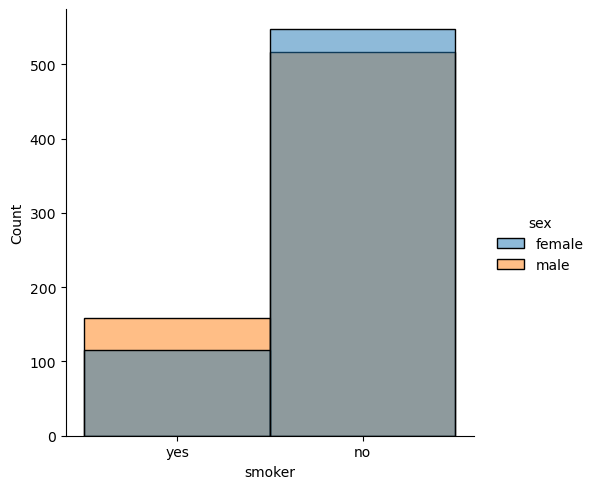

In [24]:
sns.displot(data, x="smoker", hue="sex")
plt.show()

<AxesSubplot:xlabel='charges', ylabel='smoker'>

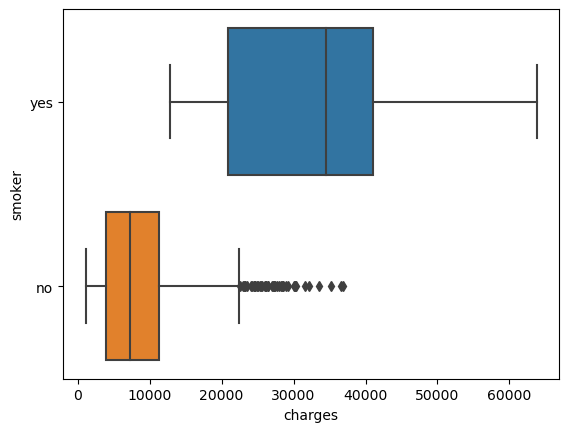

In [25]:
sns.boxplot(x='charges',y='smoker',data=data)

<AxesSubplot:xlabel='charges', ylabel='smoker'>

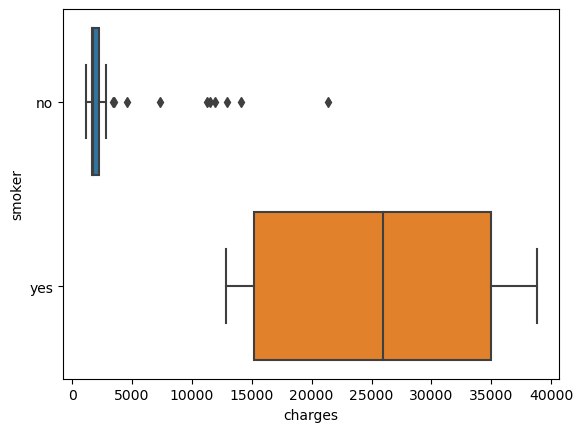

In [26]:
sns.boxplot(x='charges',y='smoker',data = data[(data['age'] == 18)])

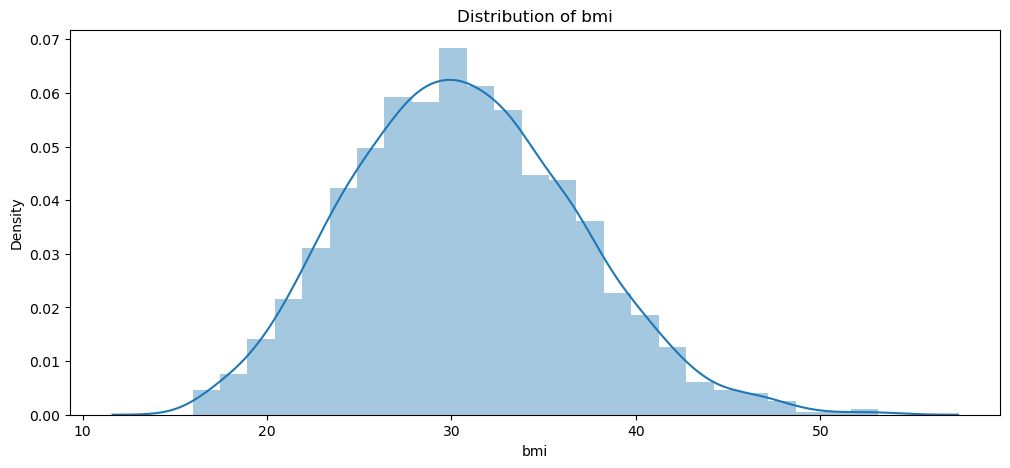

In [27]:
plt.figure(figsize=(12,5))
plt.title("Distribution of bmi")
sns.distplot(data["bmi"])
plt.show()

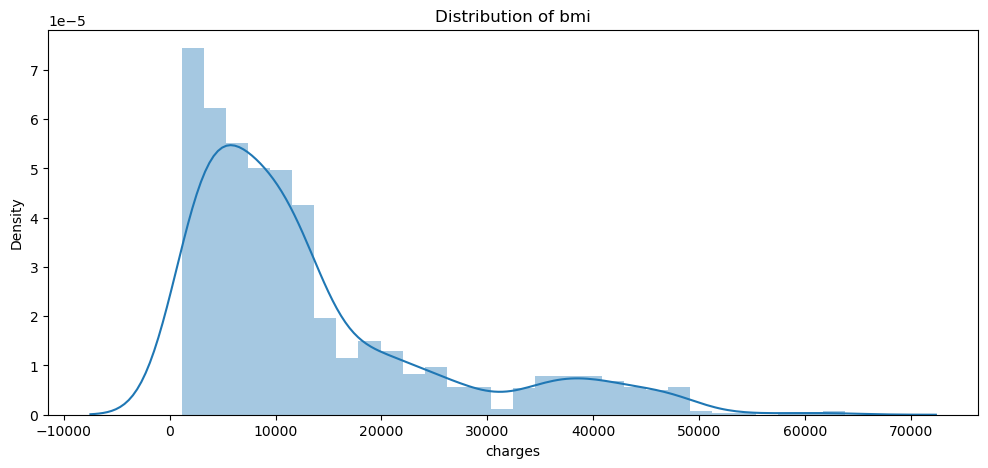

In [28]:
plt.figure(figsize=(12,5))
plt.title("Distribution of bmi")
sns.distplot(data["charges"])
plt.show()

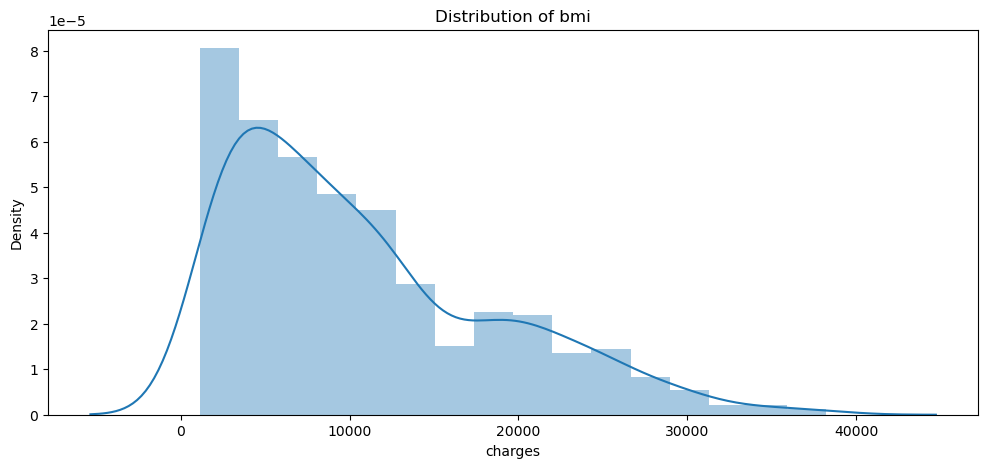

In [29]:
plt.figure(figsize=(12,5))
plt.title("Distribution of bmi")
sns.distplot(data[(data.bmi < 30)]['charges'])
plt.show()

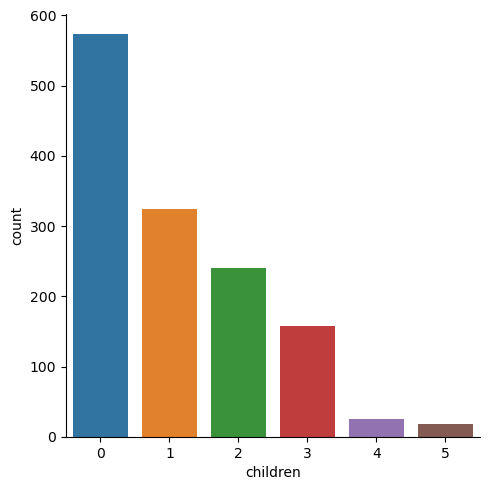

In [30]:
sns.catplot(x="children", kind="count",data=data)

In [31]:
data['sex']=data['sex'].map({'female':0,'male':1})

In [32]:
data['smoker']=data['smoker'].map({'no':0,'yes':1})

In [33]:
data['region']=data['region'].map({'southwest':0,'southeast':1,'northwest':2,'northeast':3})

In [34]:
X = data.drop(['charges'], axis = 1)
y = data.charges

##### SkLearn

In [35]:
X_train,X_test,y_train,y_test = train_test_split(X,y, random_state = 0)

In [36]:
X_train.shape

(1003, 6)

In [37]:
X_test.shape

(335, 6)

In [38]:
data.shape

(1338, 7)

In [39]:
lr = LinearRegression().fit(X_train,y_train)

In [40]:
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

print(lr.score(X_test,y_test))

0.7962732059725786


In [41]:
y_test

578      9724.53000
610      8547.69130
569     45702.02235
1034    12950.07120
198      9644.25250
           ...     
574     13224.05705
1174     4433.91590
1327     9377.90470
817      3597.59600
1337    29141.36030
Name: charges, Length: 335, dtype: float64

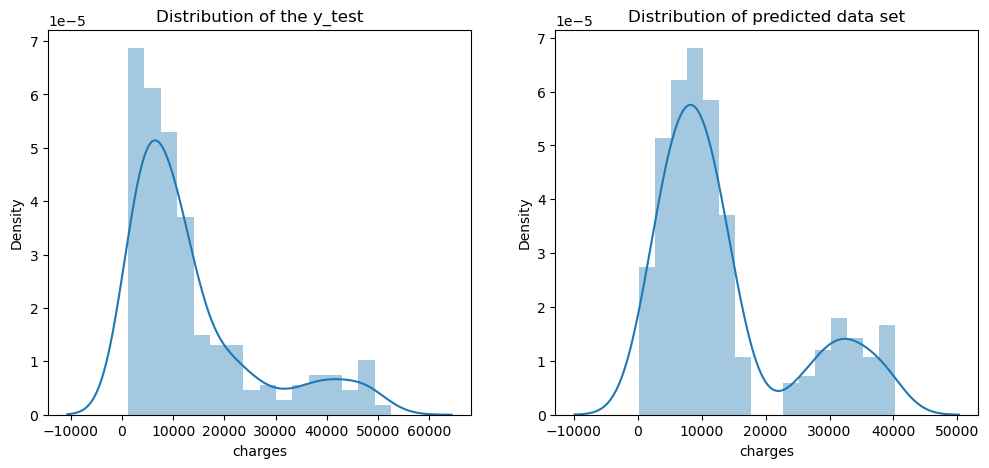

In [42]:
f= plt.figure(figsize=(12,5))
ax=f.add_subplot(121)
sns.distplot(y_test)
ax.set_title('Distribution of the y_test')

ax=f.add_subplot(122)
sns.distplot(y_test_pred)
ax.set_title('Distribution of predicted data set')
ax.set_xlabel('charges')
plt.show()


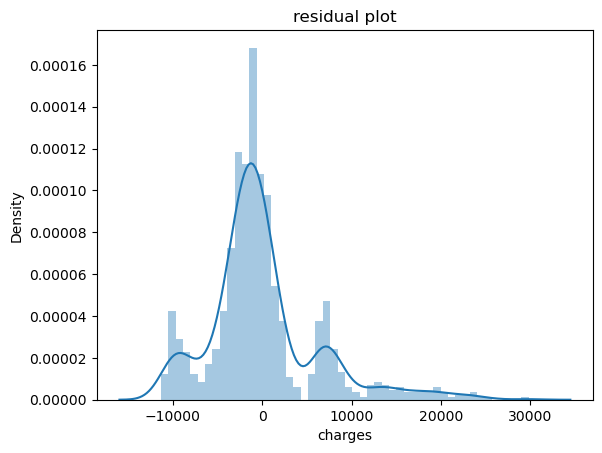

In [43]:
res = y_train - y_train_pred
plt.figure()
sns.distplot(res)
plt.title('residual plot')
plt.show()